#### Using yfinance instead of alphavantage to get stock price data

In [30]:
# getting s&p data

import requests
import bs4 as bs

#return: a list of S&P500 company symbols in alphabetical order
def get_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})

    tickers = []

    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    tickers = [s.replace('\n', '') for s in tickers]

    return tickers

In [31]:
# getting stock price data for a company

import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt

def generate_daily(ticker):

    startDate = '2023-01-01'
    endDate = '2023-01-31'

    data = yf.download(ticker, startDate, endDate)
    categories = ['Open', 'High', 'Low', 'Close']

    df = {}
    for cat in categories:
        df[cat] = pd.DataFrame(data)[cat]
        plt.plot(df[cat])
        plt.show()

    return data

[*********************100%%**********************]  1 of 1 completed


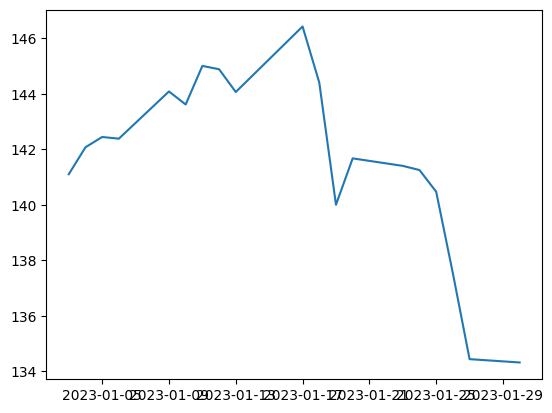

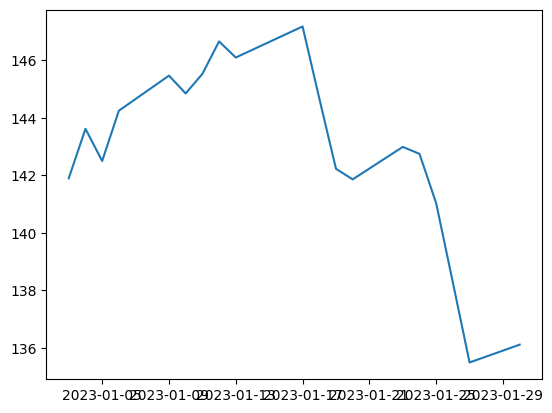

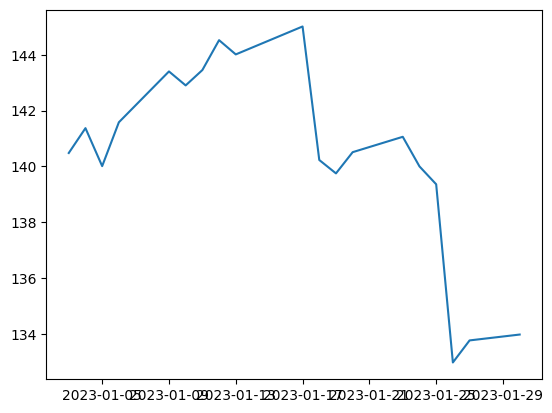

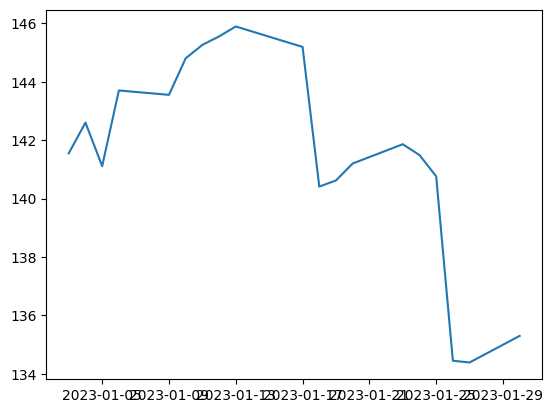

In [32]:
tickers = get_tickers()

data = generate_daily('IBM')
